<h2 dir="rtl">
ندا تقی زاده سراجه
    <br>

    98170743
    
    موضوع: متون شعرای مختلف .
</h2>

<h3 dir="rtl">
    
در این تمرین قصد داریم داده با کمک کتابخانه های beautifulSoup , request  استفاده نماییم و داده هایمان را از سایت مد نظر (گنجور) کراول کنیم.                    
 
همچنین توضیحات نحوه ی استفاده از این کتابخانه و دستورات بیشتر آن در لینک روبه رو قابل مشاهده است.
    [check this Web Site](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
</h3>

In [36]:
import  requests
from bs4 import BeautifulSoup

<h4 dir="rtl">
در تمرین فردی خود قصد کراول کردن دیتا از سایت گنجور را دارم که در ابتدا آدرس سایت مربوطه را درون متغیری ریخته و همچنین  آرایه ای پیرامون نگه داری تمامی لینک های صفحه ی اول سایت نگه میداریم.
</h4>

In [3]:
base_url="https://ganjoor.net"

all_links_list=[]

<h4 dir="rtl">
همچنین از سه دسته ی گوناگون شاعر انتخاب کرده و لیست های مربوطه را برای ذخیره سازی لینک های سه دسته ی                 شاعران مرد قدیمی و شاعران زن قدیمی و شاعران امروزی طبقه بندی مینماییم و همچنین لیست دیگری طراحی میکنیم که نام تمامی این افراد را نگه داری کند.
</h4>

In [4]:
women_poets_list=[]
men_poets_list=[]
contemporary_poets_list=[]
all_names_list=[]

<h4 dir="rtl">
در تابع زیر به سایت مد نظر درخواست فرستاده و تمامی لینک های موجود که با تگ  a  آغاز میشوند را باز میگرداند و درون لیست مربوطه مان نگه داری میکنیم.
</h4>

In [5]:
def send_request( address , class_name , list_name , base_url ):
  request_first_page= requests.get(address)
  soup_first_page = BeautifulSoup(request_first_page.text, "html.parser")
  poets_first_page = soup_first_page.select(class_name)
  for i in poets_first_page:
    list_name.append(base_url + str(i.a['href']))


<h4 dir="rtl">
با توجه به ساختار سایت گنجور، تمامی لینک های درون صفحه ی اول سایت جمع آوری شده و حالا باید دنبال لینکهای مد نظرمان بر اساس شاعرانی که میخواهیم باشند، پس به تابع زیر اسم شاعران مربوطه را میدهیم که لینک آدرس هر صفحه ی شاعر را درون لیست های از پیش تعریف شده مان ذخیره سازد.
</h4>

In [6]:
def select_poets(links_list, name1, name2, name3, poestList):
  for i in links_list:

    if i.__contains__(name1) or i.__contains__(name2) or i.__contains__(name3):
      if i not in poestList: #Avoid adding duplicates
        poestList.append(i)


<h4 dir="rtl">
تابع زیر هم برای این است که هنگامی که داده هایمان را کراول کردیم درون فایل بنویسیم.
</h4>

In [7]:
def write_in_file( filename , mesrae_list ):
  with open(filename , 'w' , encoding="UTF-8") as f:
    for i in mesrae_list:
      f.write("%s\n" % i)

<h4 dir="rtl">
در خط زیر تابع از پیش تعریف شده را صدا میزنیم و با توجه به کلاس مربوطه، داده ی مورد نظرمان را از این صفحه جمع آوری میکنیم.
</h4>

In [8]:
send_request("https://ganjoor.net"  ,  ".poet"  , all_links_list , base_url)


<h4 dir="rtl">
در سلول زیر هم تابع از پیش تعریف شده ی مربوطه را فرا میخوانیم و شاعرانی که مدنظر داریم را میابیم و لینک هایشان را درون لیست های از پیش ساخته شده میریزیم.
</h4>

In [9]:
select_poets(all_links_list, "hafez", "ferdousi", "vahshi", men_poets_list)
select_poets(all_links_list, "mahsati" , "jahan", "afsar", women_poets_list)
select_poets(all_links_list, "iraj" ,"parvin", "shahriar", contemporary_poets_list)


<h4 dir="rtl">
در سایت گنجور برای دیدن اشعار مربوطه باید از دو پارت عبور کرد و برای برخی دیگر از شعرا با عبور کردن از یک صفحه میتوان به اشعار مربوطه دست یافت برای روشن تر کردن مطلب به دو مثال زیر دقت فرمایید:
    
    برای مثال اگر به دنبال اشعار فردوسی میگردین، ابتدا باید وارد صفحه ی اولیه سایت گنجور شوید و پس از کلیک بر روی نام فردوسی به صفحه ای منتقل میشوید که باید از بین کتبش یکی را برگزینید حالا پس از انتخاب نام کتاب، به صفحه ی دیگری منتقل میشوید که نوع و دسته بندی شعر مربوطه تان را انتخاب کنید که این فرآیند در دو پارت انجام میشود.
    و همچنین اگر شما به دنبال اشعار حافط باشید و در صفحه ی اولیه و اصلی سایت گنجور روی اسم این شاعر کلیک کنید به صفحه ای میروید که اشعار وی را دسته بندی کرده (مثلا غزلیات، قطعات، رباعیات و....) سپس با انتخاب نوع شعر مورد نر برایتان اشعار مربوزه نشان داده میشود این مثالی از تک پارتی بود که در تابع بعدی کد آن درج شده است (به عبارتی در کد زیر ما مجبوریم یک صفحه را بیشتر بگردیم تا به داده ی مورد نظر دست یابیم.)  
</h4>

In [10]:
def get_poems_in_two_part_pages(list_of_poet , index , name1 , name2  , all_names_list):
  hafez_link = str(list_of_poet[index])+"/"
  poet_href_list = []
  send_request( hafez_link ,  ".part-title-block" , poet_href_list , base_url)


  kind_of_poem_link= ""
  for i in poet_href_list:
    if i.__contains__(name1):
      kind_of_poem_link = i +"/"


  all_kinds_links_list = []
  send_request(kind_of_poem_link  , ".part-title-block" , all_kinds_links_list , base_url )


  part2=""
  for i in all_kinds_links_list:
    if i.__contains__(name2):
      part2 = i +"/"


  all_kinds_links_list2 = []
  send_request(part2  , ".poem-excerpt" , all_kinds_links_list2 , base_url )


  mesraee_list=[]

  for i in all_kinds_links_list2:
    request_mesraee = requests.get( str(i) )
    soup_mesraee_page = BeautifulSoup(request_mesraee.text, "html.parser")
    mesraee = [div.get_text()  for div in soup_mesraee_page.select('div[class^="m"]') ][0: -1]
    mesraee_list += mesraee

  file_name=  str(list_of_poet[index]).split("/")[3]+"_"+name2+".txt"
  all_names_list.append(  str(file_name))
  write_in_file( file_name , mesraee_list )



<h4 dir="rtl">
این تابع هم مشابه تابع قبلی است که مثالی هم برای این مورد ذکر شد.
</h4>

In [11]:
def get_single_page_poems(list_of_poet, name1, index , all_names_list):
  hafez_link = str(list_of_poet[index]) + "/"
  poet_href_list = []
  send_request( hafez_link ,  ".part-title-block" , poet_href_list , base_url)


  kindof_poet_link= ""
  for i in poet_href_list:
    if i.__contains__(name1):
      kindof_poet_link = i +"/"


  all_poet_links_list = []
  send_request(kindof_poet_link  , ".poem-excerpt" , all_poet_links_list , base_url )

  mesraee_list=[]

  for i in all_poet_links_list:
    request_mesraee = requests.get( str(i) )
    soup_mesraee_page = BeautifulSoup(request_mesraee.text, "html.parser")
    mesraee = [div.get_text()  for div in soup_mesraee_page.select('div[class^="m"]') ][0: -1]
    mesraee_list += mesraee

  file_name =  str(list_of_poet[index]).split("/")[3] + "_" + name1 + ".txt"
  all_names_list.append(  str(file_name) )
  write_in_file( file_name , mesraee_list )

<h4 dir="rtl">
حالا بر اساس دو پارتی یا تک پارتی بودن شاعران آنها را در توابع مربوط به خود صدا میزنیم
همچنین اگر به ساختار سایت آشنایی نداشته باشید و در نحوه ی صدا زدن شاعر شک داشته باشید با توجه به کتب شاعر و سبک های شعری وی میتوان فهمید که وی را در چه تابعی گنجاند و کال کرد
</h4>

In [12]:
get_single_page_poems(men_poets_list, "ghazal", 0 , all_names_list)
get_poems_in_two_part_pages(men_poets_list , 1 , "shahname" , "sohrab" , all_names_list )
get_poems_in_two_part_pages(men_poets_list , 2 , "divanv" , "ghazalv" , all_names_list )

get_single_page_poems(contemporary_poets_list , "ghaside", 0 , all_names_list)
get_poems_in_two_part_pages(contemporary_poets_list , 1 , "divanp" , "ghasidep" , all_names_list )
get_single_page_poems(contemporary_poets_list , "gozidegh", 2 , all_names_list)

get_single_page_poems(women_poets_list , "robmah", 0 , all_names_list )
get_poems_in_two_part_pages(women_poets_list ,1 , "divan" , "ghaside" , all_names_list)
get_single_page_poems(women_poets_list , "kooroshname", 2 , all_names_list )

<h4 dir="rtl">
لینک های جمع آوری شده را در لیست مربوطه پرینت میکنیم.
</h4>

In [13]:
print(all_names_list)

['hafez_ghazal.txt', 'ferdousi_sohrab.txt', 'vahshi_ghazalv.txt', 'iraj_ghaside.txt', 'parvin_ghasidep.txt', 'shahriar_gozidegh.txt', 'mahsati_robmah.txt', 'jahan_ghaside.txt', 'afsar_kooroshname.txt']


<h4 dir="rtl">
حال با توجه به دیتاهای جمع آوری شده و کتاب خانه های مربوطه مصراع ها را خوانده و درون دیکشنری ای ذخیره میکنیم که کلیدش نام شاعر مربوزه (نام فایل )است و ولیوهای آن مصراع ها است و همچنین سپس آنها را نرمال سازی کرده و برای مثال مموارد اضافی از قبیل اعراب و ... را پاک سازی میکنیم.
</h4>

In [14]:
import hazm
import tqdm
from hazm import *
import random
import codecs

mesra_collection_dict={}

normalizer = Normalizer()

mesra_normalized = {}


for i in all_names_list:
    mesra_collection_dict[i] = [x.strip().split() for x in
                                tqdm.tqdm(codecs.open( i , 'rU', 'utf-8').readlines())]

    mesra_normalized[i] = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection_dict[i])]



100%|██████████| 5699/5699 [00:00<00:00, 8574.33it/s]


<h4 dir="rtl">
حالا موارد ساخته شده را پرینت میکنیم.
</h4>

In [15]:
print(mesra_collection_dict)

{'hafez_ghazal.txt': [['اَلا', 'یا', 'اَیُّهَا', 'السّاقی', 'اَدِرْ', 'کَأسَاً', 'و', 'ناوِلْها'], ['که', 'عشق', 'آسان', 'نمود', 'اوّل', 'ولی', 'افتاد', 'مشکل\u200cها'], ['به', 'بویِ', 'نافه\u200cای', 'کآخر', 'صبا', 'زان', 'طُرّه', 'بگشاید'], ['ز', 'تابِ', 'جَعدِ', 'مشکینش', 'چه', 'خون', 'افتاد', 'در', 'دل\u200cها'], ['مرا', 'در', 'منزلِ', 'جانان', 'چه', 'امنِ', 'عیش', 'چون', 'هر', 'دَم'], ['جَرَس', 'فریاد', 'می\u200cدارد', 'که', 'بَربندید', 'مَحمِل\u200cها'], ['به', 'مِی', 'سجّاده', 'رنگین', 'کن', 'گَرت', 'پیرِ', 'مُغان', 'گوید'], ['که', 'سالِک', 'بی\u200cخبر', 'نَبوَد', 'ز', 'راه', 'و', 'رسمِ', 'منزل\u200cها'], ['شبِ', 'تاریک', 'و', 'بیمِ', 'موج', 'و', 'گردابی', 'چنین', 'هایل'], ['کجا', 'دانند', 'حالِ', 'ما', 'سبک\u200cبارانِ', 'ساحل\u200cها'], ['همه', 'کارم', 'ز', 'خودکامی', 'به', 'بدنامی', 'کشید', 'آخر'], ['نهان', 'کِی', 'مانَد', 'آن', 'رازی', 'کزو', 'سازند', 'محفل\u200cها'], ['حضوری', 'گر', 'همی\u200cخواهی', 'از', 'او', 'غایب', 'مشو', 'حافظ'], ['مَتٰی', 'ما', 'تَلْقَ', 'مَنْ', 'تَ

In [16]:
print(mesra_normalized)

{'hafez_ghazal.txt': [['الا', 'یا', 'ایها', 'الساقی', 'ادر', 'کأسا', 'و', 'ناولها'], ['که', 'عشق', 'آسان', 'نمود', 'اول', 'ولی', 'افتاد', 'مشکل\u200cها'], ['به', 'بوی', 'نافه\u200cای', 'کآخر', 'صبا', 'زان', 'طره', 'بگشاید'], ['ز', 'تاب', 'جعد', 'مشکینش', 'چه', 'خون', 'افتاد', 'در', 'دل\u200cها'], ['مرا', 'در', 'منزل', 'جانان', 'چه', 'امن', 'عیش', 'چون', 'هر', 'دم'], ['جرس', 'فریاد', 'می\u200cدارد', 'که', 'بربندید', 'محمل\u200cها'], ['به', 'می', 'سجاده', 'رنگین', 'کن', 'گرت', 'پیر', 'مغان', 'گوید'], ['که', 'سالک', 'بی\u200cخبر', 'نبود', 'ز', 'راه', 'و', 'رسم', 'منزل\u200cها'], ['شب', 'تاریک', 'و', 'بیم', 'موج', 'و', 'گردابی', 'چنین', 'هایل'], ['کجا', 'دانند', 'حال', 'ما', 'سبک\u200cباران', 'ساحل\u200cها'], ['همه', 'کارم', 'ز', 'خودکامی', 'به', 'بدنامی', 'کشید', 'آخر'], ['نهان', 'کی', 'ماند', 'آن', 'رازی', 'کزو', 'سازند', 'محفل\u200cها'], ['حضوری', 'گر', 'همی\u200cخواهی', 'از', 'او', 'غایب', 'مشو', 'حافظ'], ['متٰی', 'ما', 'تلق', 'من', 'تهویٰ', 'دع', 'الدنیا', 'و', 'اهملها'], ['صلاح', 'کا

<h4 dir="rtl">
حال در ادامه قصد داریم فرکانس کل کلمات را بگیریم که کلا هر کلمه چند بار تکرار شده که در دیکشنری فرکانس ذخیره میشوند(کلمات کلیدمان هستند و ولیو شان تعداد تکرارشان است.)
</h4>

In [17]:
frekans={}

def find_counts_of_each_word_for_all_poets(frekans):
    for key , value in mesra_normalized.items():
        for mesrae in value:
            for i in mesrae:
                if i not in frekans.keys():
                    frekans[i]=1
                else:
                    frekans[i]= (frekans[i]+1)


<h4 dir="rtl">
حال تابع مربوطه را کال کرده و سپس دیکشنری فرکانس را نشان میدهیم.
</h4>

In [18]:
find_counts_of_each_word_for_all_poets(frekans)
print(frekans)
# for all

{'الا': 23, 'یا': 193, 'ایها': 2, 'الساقی': 1, 'ادر': 1, 'کأسا': 1, 'و': 7565, 'ناولها': 1, 'که': 6520, 'عشق': 511, 'آسان': 34, 'نمود': 54, 'اول': 49, 'ولی': 158, 'افتاد': 54, 'مشکل\u200cها': 1, 'به': 5313, 'بوی': 108, 'نافه\u200cای': 2, 'کآخر': 4, 'صبا': 126, 'زان': 162, 'طره': 26, 'بگشاید': 28, 'ز': 2538, 'تاب': 65, 'جعد': 4, 'مشکینش': 1, 'چه': 1398, 'خون': 285, 'در': 3401, 'دل\u200cها': 9, 'مرا': 434, 'منزل': 62, 'جانان': 58, 'امن': 13, 'عیش': 59, 'چون': 874, 'هر': 892, 'دم': 176, 'جرس': 8, 'فریاد': 46, 'می\u200cدارد': 8, 'بربندید': 1, 'محمل\u200cها': 1, 'می': 501, 'سجاده': 8, 'رنگین': 18, 'کن': 428, 'گرت': 33, 'پیر': 132, 'مغان': 43, 'گوید': 37, 'سالک': 11, 'بی\u200cخبر': 12, 'نبود': 206, 'راه': 338, 'رسم': 42, 'منزل\u200cها': 1, 'شب': 348, 'تاریک': 20, 'بیم': 34, 'موج': 20, 'گردابی': 3, 'چنین': 253, 'هایل': 1, 'کجا': 146, 'دانند': 11, 'حال': 131, 'ما': 1112, 'سبک\u200cباران': 1, 'ساحل\u200cها': 1, 'همه': 866, 'کارم': 12, 'خودکامی': 5, 'بدنامی': 6, 'کشید': 69, 'آخر': 124, 'نهان': 6

<h4 dir="rtl">
حال در کد زیر میخواهیم ببینیم که چه کلمه ای بیشتر تکرار شده و آن را نمایش میدهیم.
</h4>

In [19]:
most_repitation= max(frekans.items(), key=lambda t: t[::-7])
print(most_repitation)

('و', 7565)


<h4 dir="rtl">
در کد زیر کلمات را از کمترین بار تکرار تا بیشترین تکرار نمایش میدهیم.
</h4>

In [20]:
sorted_words_maxUses_to_smaleestUses_list = sorted(frekans, key=frekans.get, reverse=False)
print(sorted_words_maxUses_to_smaleestUses_list)


['الساقی', 'ادر', 'کأسا', 'ناولها', 'مشکل\u200cها', 'مشکینش', 'بربندید', 'محمل\u200cها', 'منزل\u200cها', 'هایل', 'سبک\u200cباران', 'ساحل\u200cها', 'محفل\u200cها', 'حضوری', 'همی\u200cخواهی', 'متٰی', 'تلق', 'تهویٰ', 'اهملها', 'بکجا', 'رویم؟،', 'همی\u200c', 'هندویش', 'بخارا', 'لولیان', 'شیرین\u200cکار', 'ناتمام', 'دانستم', 'نفرین،', 'می\u200cزیبد،', 'دوست\u200cتر', 'سعادتمند', 'سفتی،', 'شکرفروش', 'گل؟', 'سهی\u200c', 'سیه\u200c', 'ماه\u200c', 'صاحب\u200cدلان', 'کشتی\u200cشکستگانیم', 'ده\u200cروزه', 'گل\u200c', 'مل', 'هبوا', 'السکارا', 'نیک\u200cنامی', 'نمی\u200cپسندی', 'تلخ\u200cوش', 'ام\u200cالخبائثش', 'اشهی', 'احلی', 'قبلة', 'العذارا', 'تنگ\u200cدستی', 'غیرتت', 'سکندر،', 'پارسی\u200cگو،', 'بخشندگان', 'نپوشید', 'می\u200cآلود', 'پاک\u200cدامن', 'ملازمان', 'دیوسیرت', 'ثاقب', 'برفروزی', 'نمودی؟', 'سحرخیز', 'لعل\u200cفام', 'عالی\u200cمقام', 'بازچین', 'یک\u200cدو', 'نچیدی', 'بازبین', 'کفم', 'ازرق\u200cفام', 'بدنامی\u200cست', 'نمی\u200cخواهیم', 'افسردگان', 'دلارامی', 'سیم\u200cاندام', 'مغبچهٔ',

<h4 dir="rtl">
حالا صدتا کلمه ای که بیشترین بار تکرار شده اند را پیدا میکنیم تا در تمامی  داده های کراول شده مان آنها را بررسی نماییم و در دیکشنری هایی که در ادامه تعریف کردیم، ذخیره نماییم.
</h4>

In [21]:
num=100
most100_list=[]

for i in reversed(sorted_words_maxUses_to_smaleestUses_list):
    if num ==0:
        break
    else:
        most100_list.append(i)
        num-=1
        
print(most100_list)

['و', 'که', 'به', 'از', 'در', 'تو', 'ز', 'من', 'را', 'بر', 'این', 'آن', 'است', 'چو', 'چه', 'دل', 'با', 'ای', 'بود', 'ما', 'او', 'سر', 'تا', 'شد', 'هر', 'چون', 'همه', 'خود', 'گر', 'نه', 'جان', 'نیست', 'هم', 'اگر', 'کرد', 'دست', 'چشم', 'عشق', 'می', 'بی', 'یک', 'حافظ', 'گل', 'کار', 'روی', 'مرا', 'آمد', 'کن', 'باد', 'شاه', 'همی', 'غم', 'گفت', 'وحشی', 'خوش', 'کند', 'جهان', 'کنم', 'شب', 'راه', 'یکی', 'پیش', 'باشد', 'دگر', 'کس', 'یار', 'کز', 'خویش', 'دارد', 'خاک', 'باز', 'خون', 'دو', 'شود', 'اندر', 'ره', 'روز', 'آب', 'هست', 'بس', 'سوی', 'رفت', 'ماه', 'چنین', 'کسی', 'لب', 'سخن', 'زلف', '،', 'دیده', 'بهر', 'پر', 'جز', 'داد', 'چند', 'دور', 'آتش', 'پای', 'بد', 'پس']


In [22]:
hafez_dict = {}
ferdousi_dict = {}
vahshi_dict = {}
mahsati_dict = {}
jahan_dict = {}
afsar_dict = {}
iraj_dict = {}
parvin_dict = {}
shahriar_dict = {}

dicts_names_list=[hafez_dict,ferdousi_dict,vahshi_dict,mahsati_dict,jahan_dict,afsar_dict,iraj_dict,parvin_dict,shahriar_dict]


iraj_list_words=[]
ferdousi_list_words=[]
hafez_list_words=[]
jahan_list_words=[]
mahsati_list_words=[]
parvin_list_words=[]
shahriar_list_words=[]
vahshi_list_words=[]
afsar_list_words=[]


<h4 dir="rtl">
در تابع زیر 100 کلمه ی پر تکرار را در داده هایمان بررسی میکنیم و تعداد تکرر هر یک از کلمات را در هر فایل به دست میاوریم.
</h4>

In [23]:
def fill_dicts(contents , yourlist_word , most100_list , your_dict  ):
    for j in contents:
        yourlist_word += (j.replace("\n", "").split(" "))

    for most_word in most100_list:
        for afsar_word in yourlist_word:
            if most_word == afsar_word:
                if most_word not in your_dict.keys():
                    your_dict[most_word] = 1
                else:
                    your_dict[most_word] = your_dict[most_word] + 1



<h4 dir="rtl">
باتوجه به تابع قبل و داده هایمان دیکشنری های از پیش تعریف شده را مطابق انتظارمان پر میکنیم.
</h4>

In [24]:
contents=''
for i in all_names_list:
    with open(i , 'r' , encoding="UTF-8" ) as f:
        contents = f.readlines()

        if i.__contains__("hafez"):
            fill_dicts(contents , hafez_list_words , most100_list , hafez_dict  )
            
        if i.__contains__("ferdousi"):
            fill_dicts(contents , ferdousi_list_words , most100_list , ferdousi_dict  )
        
        if i.__contains__("vahshi"):
            fill_dicts(contents , vahshi_list_words , most100_list , vahshi_dict  )

            
        if i.__contains__("mahsati"):
            fill_dicts(contents , mahsati_list_words , most100_list , mahsati_dict  )

        if i.__contains__("jahan"):
            fill_dicts(contents , jahan_list_words , most100_list , jahan_dict  )

        if i.__contains__("afsar"):
            fill_dicts(contents , afsar_list_words , most100_list , afsar_dict  )


        if i.__contains__("iraj"):
            fill_dicts(contents, iraj_list_words, most100_list, iraj_dict)

        if i.__contains__("parvin"):
            fill_dicts(contents , parvin_list_words , most100_list , parvin_dict  )

        if i.__contains__("shahriar"):
            fill_dicts(contents , shahriar_list_words , most100_list , shahriar_dict  )

        


<h4 dir="rtl">
حال نتایج مان را نشان میدهیم که در هر یک از اشعار شاعر مربوطه آن 100 کلمه ی پرتکرار به صورت اختصاصی در داک شاعر مربوطه چندبار آمده.
    لازم به ذکر است که میتوانستیم تمامی دیکشنری ها را درون لیست بریزیم و نتایج مان را درون لوپ و مختصرتر نشان دهیم اما برای اینکه جداجدا و بهتر نشان داده شود به صورت جدا برای هر یک از شاعران نتایج را جدا نشان میدهیم.
</h4>

In [25]:
print(hafez_dict)

{'و': 2227, 'که': 2445, 'به': 1815, 'از': 1419, 'در': 1224, 'تو': 819, 'ز': 753, 'من': 589, 'را': 539, 'بر': 545, 'این': 665, 'آن': 636, 'است': 583, 'چو': 366, 'چه': 509, 'دل': 457, 'با': 346, 'ای': 400, 'بود': 268, 'ما': 462, 'او': 227, 'سر': 276, 'تا': 342, 'شد': 216, 'هر': 327, 'چون': 222, 'همه': 143, 'خود': 167, 'گر': 291, 'نه': 200, 'جان': 202, 'نیست': 239, 'هم': 88, 'اگر': 171, 'کرد': 182, 'دست': 177, 'چشم': 132, 'عشق': 188, 'می': 213, 'بی': 113, 'یک': 105, 'حافظ': 445, 'گل': 172, 'کار': 110, 'روی': 131, 'مرا': 100, 'آمد': 104, 'کن': 152, 'باد': 202, 'شاه': 59, 'همی': 1, 'غم': 125, 'گفت': 129, 'وحشی': 5, 'خوش': 198, 'کند': 71, 'جهان': 134, 'کنم': 95, 'شب': 66, 'راه': 72, 'یکی': 11, 'پیش': 54, 'باشد': 99, 'دگر': 57, 'کس': 111, 'یار': 134, 'کز': 113, 'خویش': 51, 'دارد': 132, 'خاک': 97, 'باز': 77, 'خون': 91, 'دو': 69, 'شود': 80, 'اندر': 62, 'ره': 94, 'روز': 66, 'آب': 89, 'هست': 62, 'بس': 74, 'سوی': 21, 'رفت': 88, 'ماه': 57, 'چنین': 45, 'کسی': 50, 'لب': 81, 'سخن': 76, 'زلف': 97, '،':

In [26]:
print(ferdousi_dict)

{'و': 503, 'که': 269, 'به': 469, 'از': 251, 'در': 59, 'تو': 124, 'ز': 244, 'من': 86, 'را': 143, 'بر': 207, 'این': 54, 'آن': 58, 'است': 8, 'چو': 165, 'چه': 45, 'دل': 61, 'با': 92, 'ای': 11, 'بود': 79, 'ما': 10, 'او': 103, 'سر': 48, 'تا': 34, 'شد': 78, 'هر': 38, 'چون': 42, 'همه': 55, 'خود': 17, 'گر': 34, 'نه': 23, 'جان': 14, 'نیست': 31, 'هم': 42, 'اگر': 24, 'کرد': 53, 'دست': 44, 'چشم': 5, 'می': 12, 'بی': 1, 'یک': 27, 'گل': 3, 'کار': 44, 'روی': 47, 'مرا': 31, 'آمد': 53, 'کن': 13, 'باد': 16, 'شاه': 48, 'همی': 110, 'غم': 7, 'گفت': 113, 'خوش': 2, 'کند': 17, 'جهان': 42, 'کنم': 10, 'شب': 24, 'راه': 20, 'یکی': 87, 'پیش': 54, 'باشد': 16, 'دگر': 12, 'کس': 24, 'یار': 4, 'کز': 14, 'خویش': 16, 'دارد': 6, 'خاک': 18, 'باز': 17, 'خون': 14, 'دو': 40, 'شود': 21, 'اندر': 68, 'ره': 5, 'روز': 27, 'آب': 15, 'هست': 3, 'بس': 10, 'سوی': 34, 'رفت': 21, 'ماه': 16, 'چنین': 58, 'کسی': 31, 'لب': 11, 'سخن': 40, '،': 2, 'دیده': 6, 'بهر': 8, 'پر': 35, 'جز': 12, 'داد': 21, 'چند': 5, 'دور': 8, 'آتش': 12, 'پای': 24, 'بد':

In [27]:
print(vahshi_dict)

{'و': 976, 'که': 1239, 'به': 927, 'از': 878, 'در': 604, 'تو': 529, 'ز': 433, 'من': 542, 'را': 431, 'بر': 392, 'این': 398, 'آن': 303, 'است': 228, 'چو': 100, 'چه': 287, 'دل': 237, 'با': 209, 'ای': 164, 'بود': 208, 'ما': 337, 'او': 244, 'سر': 189, 'تا': 160, 'شد': 141, 'هر': 176, 'چون': 157, 'همه': 80, 'خود': 239, 'گر': 184, 'نه': 98, 'جان': 174, 'نیست': 165, 'هم': 109, 'اگر': 144, 'کرد': 96, 'دست': 87, 'چشم': 126, 'عشق': 172, 'می': 45, 'بی': 104, 'یک': 127, 'گل': 68, 'کار': 72, 'روی': 39, 'مرا': 119, 'آمد': 66, 'کن': 111, 'باد': 41, 'شاه': 4, 'غم': 99, 'گفت': 19, 'وحشی': 377, 'خوش': 81, 'کند': 71, 'جهان': 26, 'کنم': 39, 'شب': 40, 'راه': 61, 'یکی': 16, 'پیش': 84, 'باشد': 87, 'دگر': 66, 'کس': 63, 'یار': 77, 'کز': 92, 'خویش': 105, 'دارد': 63, 'خاک': 41, 'باز': 64, 'خون': 68, 'دو': 30, 'شود': 46, 'اندر': 19, 'ره': 50, 'روز': 38, 'آب': 36, 'هست': 128, 'بس': 43, 'سوی': 39, 'رفت': 50, 'ماه': 14, 'چنین': 33, 'کسی': 97, 'لب': 50, 'سخن': 28, 'زلف': 10, '،': 158, 'دیده': 38, 'بهر': 38, 'پر': 62, 'ج

In [28]:
print(mahsati_dict)

{'و': 154, 'که': 136, 'به': 140, 'از': 125, 'در': 131, 'تو': 190, 'ز': 79, 'من': 97, 'را': 37, 'بر': 73, 'این': 21, 'آن': 60, 'است': 34, 'چو': 44, 'چه': 21, 'دل': 78, 'با': 52, 'ای': 53, 'بود': 16, 'ما': 15, 'او': 6, 'سر': 25, 'تا': 38, 'شد': 13, 'هر': 28, 'چون': 35, 'همه': 17, 'خود': 18, 'گر': 23, 'نه': 16, 'جان': 26, 'نیست': 19, 'هم': 7, 'اگر': 11, 'کرد': 13, 'دست': 16, 'چشم': 25, 'عشق': 15, 'می': 10, 'بی': 7, 'یک': 14, 'گل': 15, 'کار': 6, 'روی': 15, 'مرا': 14, 'آمد': 14, 'کن': 1, 'باد': 27, 'همی': 10, 'غم': 32, 'گفت': 6, 'خوش': 13, 'کند': 10, 'جهان': 8, 'کنم': 5, 'شب': 13, 'راه': 2, 'یکی': 2, 'پیش': 5, 'باشد': 4, 'دگر': 2, 'کس': 5, 'یار': 6, 'کز': 10, 'خویش': 7, 'دارد': 13, 'خاک': 17, 'باز': 17, 'خون': 17, 'دو': 9, 'شود': 2, 'اندر': 10, 'ره': 8, 'روز': 8, 'آب': 29, 'هست': 12, 'بس': 16, 'رفت': 6, 'ماه': 4, 'چنین': 3, 'کسی': 3, 'لب': 17, 'سخن': 5, 'زلف': 21, 'دیده': 18, 'بهر': 6, 'پر': 7, 'جز': 11, 'داد': 4, 'چند': 3, 'دور': 2, 'آتش': 14, 'پای': 8, 'بد': 1, 'پس': 3}


In [29]:
print(jahan_dict)

{'و': 36, 'که': 29, 'به': 17, 'از': 24, 'در': 24, 'تو': 42, 'ز': 27, 'من': 7, 'را': 8, 'بر': 15, 'این': 6, 'آن': 4, 'است': 4, 'چو': 1, 'چه': 3, 'دل': 4, 'با': 6, 'ای': 13, 'ما': 1, 'او': 3, 'سر': 4, 'تا': 6, 'شد': 4, 'هر': 2, 'چون': 10, 'همه': 1, 'گر': 2, 'نه': 2, 'جان': 4, 'نیست': 1, 'هم': 2, 'اگر': 1, 'کرد': 3, 'دست': 4, 'عشق': 2, 'می': 3, 'بی': 6, 'یک': 1, 'گل': 3, 'کار': 1, 'روی': 2, 'آمد': 1, 'کن': 7, 'باد': 2, 'شاه': 3, 'غم': 1, 'کند': 1, 'جهان': 9, 'کنم': 1, 'راه': 2, 'باشد': 1, 'کز': 3, 'خویش': 1, 'دارد': 18, 'خاک': 1, 'باز': 1, 'خون': 1, 'دو': 2, 'شود': 2, 'اندر': 1, 'ره': 2, 'روز': 1, 'سوی': 5, 'کسی': 1, 'سخن': 2, 'زلف': 3, 'دیده': 1, 'داد': 1, 'دور': 1, 'آتش': 2, 'پای': 1}


In [30]:
print(afsar_dict)

{'و': 1410, 'که': 679, 'به': 227, 'از': 686, 'در': 413, 'تو': 272, 'ز': 478, 'من': 246, 'را': 304, 'بر': 439, 'این': 253, 'آن': 342, 'است': 194, 'چو': 413, 'چه': 94, 'دل': 73, 'با': 251, 'ای': 124, 'بود': 160, 'ما': 93, 'او': 267, 'سر': 186, 'تا': 125, 'شد': 313, 'هر': 67, 'چون': 128, 'همه': 354, 'خود': 188, 'گر': 17, 'نه': 115, 'جان': 68, 'نیست': 27, 'هم': 158, 'اگر': 33, 'کرد': 86, 'دست': 60, 'چشم': 24, 'عشق': 12, 'می': 12, 'بی': 65, 'یک': 82, 'حافظ': 6, 'گل': 44, 'کار': 69, 'روی': 106, 'مرا': 80, 'آمد': 134, 'کن': 28, 'باد': 44, 'شاه': 276, 'همی': 194, 'غم': 33, 'گفت': 96, 'وحشی': 2, 'خوش': 25, 'کند': 31, 'جهان': 51, 'کنم': 46, 'شب': 30, 'راه': 65, 'یکی': 140, 'پیش': 45, 'باشد': 28, 'دگر': 120, 'کس': 23, 'یار': 14, 'کز': 9, 'خویش': 49, 'دارد': 11, 'خاک': 20, 'باز': 37, 'خون': 15, 'دو': 39, 'شود': 44, 'اندر': 37, 'ره': 9, 'روز': 29, 'آب': 23, 'هست': 19, 'بس': 38, 'سوی': 124, 'رفت': 30, 'ماه': 71, 'چنین': 63, 'کسی': 17, 'لب': 4, 'سخن': 49, 'زلف': 2, '،': 9, 'دیده': 9, 'بهر': 71, 'پر':

In [31]:
print(iraj_dict)

{'و': 675, 'که': 431, 'به': 508, 'از': 362, 'در': 240, 'تو': 299, 'ز': 169, 'من': 227, 'را': 203, 'بر': 144, 'این': 127, 'آن': 151, 'است': 60, 'چو': 68, 'چه': 64, 'دل': 57, 'با': 111, 'ای': 59, 'بود': 138, 'ما': 27, 'او': 130, 'سر': 48, 'تا': 113, 'شد': 47, 'هر': 85, 'چون': 92, 'همه': 63, 'خود': 65, 'گر': 58, 'نه': 96, 'جان': 28, 'نیست': 34, 'هم': 59, 'اگر': 69, 'کرد': 27, 'دست': 24, 'چشم': 16, 'عشق': 10, 'می': 66, 'بی': 43, 'یک': 66, 'گل': 4, 'کار': 25, 'روی': 15, 'مرا': 64, 'آمد': 11, 'کن': 14, 'باد': 18, 'شاه': 19, 'همی': 66, 'غم': 5, 'گفت': 11, 'خوش': 10, 'کند': 64, 'جهان': 30, 'کنم': 131, 'شب': 26, 'راه': 17, 'یکی': 36, 'پیش': 19, 'باشد': 37, 'دگر': 22, 'کس': 28, 'یار': 5, 'کز': 19, 'خویش': 30, 'دارد': 18, 'خاک': 7, 'باز': 6, 'خون': 1, 'دو': 49, 'شود': 32, 'اندر': 42, 'ره': 1, 'روز': 23, 'آب': 12, 'هست': 19, 'بس': 14, 'سوی': 2, 'رفت': 43, 'ماه': 15, 'چنین': 20, 'کسی': 10, 'لب': 4, 'سخن': 16, 'زلف': 3, '،': 59, 'دیده': 20, 'بهر': 13, 'پر': 12, 'جز': 13, 'داد': 13, 'چند': 14, 'دور':

In [32]:
print(parvin_dict)

{'و': 773, 'که': 459, 'به': 154, 'از': 364, 'در': 271, 'تو': 356, 'ز': 236, 'من': 9, 'را': 308, 'بر': 123, 'این': 242, 'آن': 79, 'است': 197, 'چو': 139, 'چه': 192, 'دل': 90, 'با': 80, 'ای': 92, 'بود': 69, 'ما': 41, 'او': 13, 'سر': 48, 'تا': 120, 'شد': 71, 'هر': 97, 'چون': 69, 'همه': 40, 'خود': 73, 'گر': 100, 'نه': 99, 'جان': 69, 'نیست': 36, 'هم': 14, 'اگر': 45, 'کرد': 45, 'دست': 34, 'چشم': 24, 'عشق': 3, 'می': 4, 'بی': 93, 'یک': 32, 'گل': 25, 'کار': 64, 'روی': 22, 'آمد': 7, 'کن': 37, 'باد': 11, 'همی': 38, 'غم': 17, 'گفت': 10, 'وحشی': 1, 'خوش': 12, 'کند': 38, 'جهان': 23, 'شب': 23, 'راه': 45, 'یکی': 30, 'پیش': 19, 'باشد': 6, 'دگر': 9, 'کس': 27, 'یار': 2, 'کز': 12, 'خویش': 31, 'دارد': 5, 'خاک': 8, 'باز': 19, 'خون': 17, 'دو': 12, 'شود': 25, 'اندر': 30, 'ره': 61, 'روز': 28, 'آب': 7, 'هست': 8, 'بس': 39, 'سوی': 9, 'رفت': 7, 'ماه': 4, 'چنین': 23, 'کسی': 16, 'لب': 5, 'سخن': 7, 'زلف': 1, 'دیده': 13, 'بهر': 42, 'پر': 27, 'جز': 49, 'داد': 5, 'چند': 61, 'دور': 7, 'آتش': 10, 'پای': 25, 'بد': 21, 'پس':

In [33]:
print(shahriar_dict)

{'و': 808, 'که': 828, 'به': 1044, 'از': 609, 'در': 381, 'تو': 439, 'ز': 113, 'من': 477, 'را': 198, 'بر': 98, 'این': 217, 'آن': 152, 'است': 181, 'چو': 102, 'چه': 182, 'دل': 222, 'با': 206, 'ای': 279, 'بود': 119, 'ما': 126, 'او': 80, 'سر': 149, 'تا': 124, 'شد': 61, 'هر': 72, 'چون': 119, 'همه': 113, 'خود': 90, 'گر': 80, 'نه': 78, 'جان': 69, 'نیست': 101, 'هم': 98, 'اگر': 54, 'کرد': 32, 'دست': 40, 'چشم': 104, 'عشق': 99, 'می': 89, 'بی': 67, 'یک': 43, 'حافظ': 20, 'گل': 101, 'کار': 28, 'روی': 30, 'مرا': 26, 'آمد': 39, 'کن': 60, 'باد': 38, 'شاه': 7, 'غم': 59, 'گفت': 10, 'وحشی': 6, 'خوش': 15, 'کند': 35, 'جهان': 24, 'کنم': 20, 'شب': 105, 'راه': 31, 'یکی': 10, 'پیش': 19, 'باشد': 39, 'دگر': 26, 'کس': 26, 'یار': 40, 'کز': 33, 'خویش': 12, 'دارد': 23, 'خاک': 42, 'باز': 46, 'خون': 34, 'دو': 23, 'شود': 19, 'اندر': 1, 'ره': 11, 'روز': 24, 'آب': 29, 'هست': 13, 'بس': 30, 'سوی': 5, 'رفت': 13, 'ماه': 56, 'چنین': 5, 'کسی': 26, 'لب': 40, 'سخن': 19, 'زلف': 56, '،': 2, 'دیده': 32, 'بهر': 7, 'پر': 22, 'جز': 31, '

In [34]:
for i in dicts_names_list:
    print (i)

{'و': 2227, 'که': 2445, 'به': 1815, 'از': 1419, 'در': 1224, 'تو': 819, 'ز': 753, 'من': 589, 'را': 539, 'بر': 545, 'این': 665, 'آن': 636, 'است': 583, 'چو': 366, 'چه': 509, 'دل': 457, 'با': 346, 'ای': 400, 'بود': 268, 'ما': 462, 'او': 227, 'سر': 276, 'تا': 342, 'شد': 216, 'هر': 327, 'چون': 222, 'همه': 143, 'خود': 167, 'گر': 291, 'نه': 200, 'جان': 202, 'نیست': 239, 'هم': 88, 'اگر': 171, 'کرد': 182, 'دست': 177, 'چشم': 132, 'عشق': 188, 'می': 213, 'بی': 113, 'یک': 105, 'حافظ': 445, 'گل': 172, 'کار': 110, 'روی': 131, 'مرا': 100, 'آمد': 104, 'کن': 152, 'باد': 202, 'شاه': 59, 'همی': 1, 'غم': 125, 'گفت': 129, 'وحشی': 5, 'خوش': 198, 'کند': 71, 'جهان': 134, 'کنم': 95, 'شب': 66, 'راه': 72, 'یکی': 11, 'پیش': 54, 'باشد': 99, 'دگر': 57, 'کس': 111, 'یار': 134, 'کز': 113, 'خویش': 51, 'دارد': 132, 'خاک': 97, 'باز': 77, 'خون': 91, 'دو': 69, 'شود': 80, 'اندر': 62, 'ره': 94, 'روز': 66, 'آب': 89, 'هست': 62, 'بس': 74, 'سوی': 21, 'رفت': 88, 'ماه': 57, 'چنین': 45, 'کسی': 50, 'لب': 81, 'سخن': 76, 'زلف': 97, '،':

<h4 dir="rtl">
حالا در تابع زیر میانگین استفاده ی کلمات در کل متون مون محاسبه می شود و شما میتوانید با دادن کلمه ی مربوطه تکرر آن را بیابید.
</h4>

In [74]:
res=0
def calc_avg_used_word_in_allFiles(res , word):
    try:
        for i  in dicts_names_list:
            res +=(i.get(word))
        res= res/len(dicts_names_list)
        print("The average value of %s is equal to = "%word , end="")
        print(res)
        print()
    except:
        print("we dont have %s "%word)
        print()
        

<h4 dir="rtl">
حالا برای چند کلمه تابع بالا را ران میکنیم.
</h4>

In [75]:
word1="و"
calc_avg_used_word_in_allFiles(res , word1)

word2="من"
calc_avg_used_word_in_allFiles(res , word2)

word3="غم"
calc_avg_used_word_in_allFiles(res , word3)

word4="ندااااااااااااااااااا"
calc_avg_used_word_in_allFiles(res , word4)


The average value of و is equal to = 840.2222222222222

The average value of من is equal to = 253.33333333333334

The average value of غم is equal to = 42.0

we dont have ندااااااااااااااااااا 



<h4 dir="rtl">
حالا قصد داریم برخی از کلمات حماسی را از سایت ویکی پدیا کراول کنیم و درصد تکرار آنها را در اشعار شاعران مان بررسی کنیم  و لازم به ذکر است که در هنگام کراول کردن تعداد زادی کلمات انگلیسی و چندتا ایتالیایی نیز در خروجی مان دیده میشود که با کمک کتابخانه ی nltk  توانستم کلمات انگلیسی را شناسایی و حذف نمایم اما برای حذف کلمات ایتالیایی که فقط چند مورد بودند انها را درون شرط هندل میکنم. 
</h4>

In [86]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to C:\Users\Neda
[nltk_data]     Taghizadeh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


<h4 dir="rtl">
میخواهیم در سلول بعدی کلمات حماسی مربوطه را از سایت زیر کراول نماییم.

    
[check this Web Site](https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D9%88%D8%A7%DA%98%DA%AF%D8%A7%D9%86_%D9%86%D8%B8%D8%A7%D9%85%DB%8C_%DA%A9%D8%A7%D8%B1%D8%A8%D8%B1%D8%AF%DB%8C)
    
    
    
    
لازم به ذکر است که درون متغیر select_class  ما کلماتی را که مال کلاس مربوطه است را اخذ کردیم اما بخاطر وجود ناخالصی نیاز به پاکسازی دارند.
    
</h4>

In [87]:
address_of_site_for_hemasi_words="https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D9%88%D8%A7%DA%98%DA%AF%D8%A7%D9%86_%D9%86%D8%B8%D8%A7%D9%85%DB%8C_%DA%A9%D8%A7%D8%B1%D8%A8%D8%B1%D8%AF%DB%8C"
request_= requests.get(address_of_site_for_hemasi_words)
soup_ = BeautifulSoup(request_.text, "html.parser")
select_class = soup_.select(".new")


<h4 dir="rtl">
برای حذف موارد غیر از کلمات مورد نیاز با توجه به دستوری که درون متغیر  other_than_EnglishWords ریختیم قصد داریم که کلمات انگلیسی را دور بریزیم.
</h4>

In [91]:
crowled_hamasi_worsd_list=[]

for i in select_class:
    print(i.string)
    other_than_EnglishWords = " ".join(w for w in nltk.wordpunct_tokenize(i.string) if not w.lower() in words or not w.isalpha())
    crowled_hamasi_worsd_list.append(other_than_EnglishWords)


گلوله‌باران
تله انفجاری
شکاف
خروج
سرپل
تاختن
ستون
ضد آتشبار
ناگه تک
آرایش پله‌ای
احاطه
نقطه استخراج
راهبرد فابین
مبارزه در حین عقب‌نشینی
ردیف
حرکت جانبی
تهاجم رو در رو
از کار افتاده
پیاده مربع
پایک مربع
نفوذ
ممنوعیت
رشته کشتن
استقرار
بدون چهارم داده شده‌است.
اشکانیان شات
انگشت
گیره مانور
جنگ سخت‌تن به تن.
پاکت پی سی
وتدی که مرکب از دو هجای کوتاه وغیر مشدد باشد پیروزی
حمله
رتبه
تمرکزی
ایمن گارد
Salients
سوخته زمین
Scuttling
کودتای د فضل
اول جهانی جنگ
سپر دیوار
سپر دیوار
ساقه و لیز خوردن
Circumvallation
Contravallation
ESCALADE
کس امید
Chevaux د frize
سرمایه‌گذاری
موتورهای محاصره
قطار محاصره
تسلیم در اختیار
درگیری
VEDETTE
برداشت
بیل
تبر دانمارکی
دست
سلاح قطب
با تبر زین زدن
پایک
حزبی
زنجیر
تیرکمان بچه گانه
شاهین کوچک نر
منجنیق سنگ انداز
گورخر کوچک
نیروی دریایی توپخانه
ملات
توپخانه پوسته
بنگلور اژدر
Camouflet
نارنجک دستی
نارنجک تفنگ
پرتاب نارنجک
موشک نارنجک رو
زمین مال
ضد تانک معدن
مین‌های ضد نفر
بمب آتشزا
فسفر سفید
ماشین زره پوش
نیمه مسیر
فهرست استحکامات
سنگر و استحکامات
قلعه سنگر و استحک

<h4 dir="rtl">
در تابع زیر چند کلمه ایتالیایی که در کلمات است را حذف کرده ئ حالا درون لیست just_hemasi_words_list ما کلمات حماسی فارسی را بدون ناخالصی داریم.
    
همچنین کلمات اضافی را نیز حذف میکنیم.
    
</h4>

In [143]:
just_hemasi_words_list=[]
chore_words=["reduit" , "ESCALADE" , "italienne" , "Camouflet" , "Scuttling" , "VEDETTE" , "Chevaux" , 'Circumvallation' ,"Contravallation" , "Salients" ,"Chevaux د frize" , '\u200c' ]

def clear_unnecessary_data(just_hemasi_words_list  , crowled_hamasi_worsd_list ,chore_words ):
    splited_hemasi_persian_words=[]
    for i in crowled_hamasi_worsd_list:
        splited_hemasi_persian_words += (i.split(" "))
    
    for i in splited_hemasi_persian_words:
        if (i not in chore_words):
            if i not in just_hemasi_words_list:
                just_hemasi_words_list.append(i)
                

In [145]:
clear_unnecessary_data(just_hemasi_words_list  , crowled_hamasi_worsd_list ,chore_words )

for i in just_hemasi_words_set:
    print(i)

<h4 dir="rtl">
حالا در ادامه میخواهیم با توجه به لیست کلمات حماسی کراول شده، تعداد آنها را در اشعار شاعران مان مقایسه کنیم. لازم به ذکر است که این ایده میتواند به شناسایی سبک شعری نیز کمک کند. برای این کار ابتدا تابعی را برای خواندن اشعار شاعرمان میسازیم و سپس صدا میکنیم.
</h4>

In [129]:
def read_from_file( fileName , list_name):
    with open(fileName , 'r', encoding="UTF-8") as f:
        list_name += f.readlines()
        

<h4 dir="rtl">
حالا در ادامه تابع بالا را صدا میکنیم تا اشعار شاعران مان را با سبک های مختلف دریابیم.
</h4>

In [183]:
hafez_mesrae_list=[]
read_from_file("hafez_ghazal.txt", hafez_mesrae_list)

ferdousi_mesrae_list=[]
read_from_file("ferdousi_sohrab.txt", ferdousi_mesrae_list)

vahshi_mesrae_list=[]
read_from_file("vahshi_ghazalv.txt", vahshi_mesrae_list)

mahsati_mesrae_list=[]
read_from_file("mahsati_robmah.txt", mahsati_mesrae_list)

jahan_mesrae_list=[]
read_from_file("jahan_ghaside.txt", jahan_mesrae_list)

afsar_mesrae_list=[]
read_from_file("afsar_kooroshname.txt", afsar_mesrae_list)

iraj_mesrae_list=[]
read_from_file("iraj_ghaside.txt", iraj_mesrae_list)

parvin_mesrae_list=[]
read_from_file("parvin_ghasidep.txt", parvin_mesrae_list)

shahriar_mesrae_list=[]
read_from_file("shahriar_gozidegh.txt", shahriar_mesrae_list)



<h4 dir="rtl">
همچنین برای اینکه تعداد کلمات حماسی دیده شده (با توجه به لیست کراول کرده مان) که در نهایت ببینیم چندتا هستند، برای هر یک از شعرا متغیرهایی میسازیم.
</h4>

In [131]:
numberOf_ferdowsi_hemasi_words=0
numberOf_hafez_hemasi_words=0
numberOf_iraj_hemasi_words=0
numberOf_parvin_hemasi_words=0
numberOf_mahsati_hemasi_words=0

<h4 dir="rtl">
تابع زیر پیرامون شماردن و یافتن درصد کلمات حماسی مربوطه در اشعار شاعر مورد نظرمان ساخته شده است.
    لازم به ذکر است که اعدادی که در ادامه مشاهده میکنید تا حد خوبی قابل استناد است و همانطور که حدس میزدید درصد حماسی بودن اشعار فردوسی و افسر نسبت به دیگر شاعران بیشتر بود ولیکن اگر داده ی حجیم تری با تعداد کلمات بیشتری کراول میکردیم این اختلاف و اعداد حاصل شده بیشتر میشد ولی بخاطر اینکه بنده سایت دیگری که کلمات فارسی رزمی و حماسی را داشته باشد، پیدا نکردیم بدین خاطر به همین سایت بسنده کردم و نتیجه ی مورد انتطار نیز حاصل گشت.
</h4>

In [268]:
def find_numberOf_your_words(poet_mesrae_list , my_words ):
    Unnecessary_words = ["است", "باشد" , "بدو" , "دست" , "کار" , "هوا" , "آمدن" , "پیش" ,   "کردن"]
    num=0
    numberOf_all_word=0
    darsad=0
    for mesrae in poet_mesrae_list:
        numberOf_all_word += len( mesrae.split(" ") )
        for each_hemasi_word in my_words:
            if each_hemasi_word in  mesrae:
                if len(each_hemasi_word)>=3 and each_hemasi_word not in Unnecessary_words:
                    num+=1
    print( "number of hemasi words = %s "%num)
    print("number of all words = %s " %numberOf_all_word)
    
    try:
        darsad=(num/numberOf_all_word)*100
        print("percentage of hemasi words = %s" %darsad)
    except:
        darsad=0
        print("percentage of hemasi words = %s" %darsad)
    return darsad



In [269]:
darsad_hamasi_bodan_dict={}

In [270]:
darsad_hamasi_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , just_hemasi_words  )


number of hemasi words = 1387 
number of all words = 63180 
percentage of hemasi words = 2.1953149730927506


In [271]:
darsad_hamasi_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , just_hemasi_words  )


number of hemasi words = 821 
number of all words = 12410 
percentage of hemasi words = 6.6156325543916195


In [272]:
darsad_hamasi_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , just_hemasi_words  )


number of hemasi words = 1154 
number of all words = 36622 
percentage of hemasi words = 3.1511113538310305


In [273]:
darsad_hamasi_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , just_hemasi_words  )


number of hemasi words = 148 
number of all words = 5243 
percentage of hemasi words = 2.822811367537669


In [274]:
darsad_hamasi_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , just_hemasi_words  )


number of hemasi words = 24 
number of all words = 977 
percentage of hemasi words = 2.456499488229273


In [275]:
darsad_hamasi_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , just_hemasi_words  )


number of hemasi words = 1918 
number of all words = 32258 
percentage of hemasi words = 5.945811891623784


In [276]:
darsad_hamasi_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , just_hemasi_words  )


number of hemasi words = 460 
number of all words = 16126 
percentage of hemasi words = 2.852536276820042


In [277]:
darsad_hamasi_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , just_hemasi_words  )


number of hemasi words = 681 
number of all words = 17314 
percentage of hemasi words = 3.9332332216703243


In [278]:
darsad_hamasi_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , just_hemasi_words  )


number of hemasi words = 669 
number of all words = 23233 
percentage of hemasi words = 2.8795248138423792


<h4 dir="rtl">
حالا با توجه به درصدهایی که در سلول های یالا بیان کردیم، به کمک دیکشنری از پیش ساخته شده میایم و نمودار میله ای را برای درک بهتر تفاوت ها میابیم و همانطور که مشاهده میکنید شاعرانی که سبک عاشقانه دارند همانند حافط، وجود کلمات حماسی در شعرشان کمتر است و همچنین خانم ها اشعار عاطفی بیشتری دارند.
</h4>

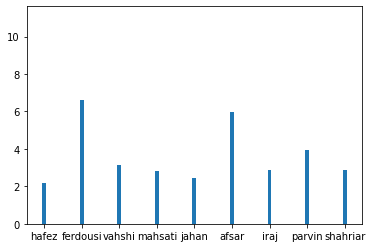

In [322]:
import pylab as pl
import numpy as np

def draw_barchart_by_dict(darsad , num ):
    X = np.arange(len(darsad))
    pl.bar(X, darsad.values(), align='center', width=0.1)
    pl.xticks(X, darsad.keys())
    ymax = max(darsad.values()) + num
    pl.ylim(0, ymax)
    pl.show()

draw_barchart_by_dict(darsad_hamasi_bodan_dict , 5)

<h4 dir="rtl">
حال در ادامه به بررسی متون عاشقانه میپردازیم و روندی مشابه کار بالا را برای متون عاشقانه و احساسی می پیماییم. همچنین برای این کار لیستی از برخی کلمات عاشقانه را آماده کردیم.
</h4>

In [280]:
darsad_emotional_bodan_dict={}
emotional_traits_list=["یار","عشق","جان","محبوب","دلبر","جانان","افسانه"
                       ,"دلدار","لیلی","وفا","چشمان" , "لحظه","افلاک"
                       ,"علاقه","مشتاق","نشاط","الهام","امیدوار","خاص",
                       "قلب","لعل","نفس","آغوش","آفاق","عطر" ,"محمل","سحر"
                       ,"دل","هوش","رخ","چشم","چشمان","لبخند","گل","صوفی"
                       ,"زندگی","بوسه","روشن","دلبر","خیال", "عهد","آشنا"
                      "نغمه" , "آفتاب","شمع","پروانه","رقص","مستی","شهاب" 
                      "مرید","سرو","باد","نقاب","قصر","صلح","طره","مهر","آتش",
                      "نسیم","جمال","خاک","جهان","مستی","حاجت","رقیب","شراب" 
                      "هوس","اوقات","ویرانه","طلسم","بوی","خون","خدا","شیرین",
                       "موزون","دیوانه","زلف","موی","پاک","جرعه","چشمه",
                      "سلامت","معجزه","رب","خال","سخن","آشیان","قافله","چشمه","طرب"
                      "انفاس","غم","باده","رقص","ساغر","قلم","خوش","شعر","سوخت","فاتحه",
                      "بهشت","گنج","سال","لبش","شهر","وصل","گنج","رحمت","دستخوش","آینه",
                      "خرقه","نرگس","گوارا","نقاب","قطره","سرزنش","گدای","رمز","بهر", 
                      "نامه","پروانه","جهان","قدر","شرح","فراق","نگران","معرکه","مجلس", 
                      "ساقی","آشمان","مدد","عالم","جمال","کفن","لاله","بهار","برگ","شب" ]

<h4 dir="rtl">
    حال همانگونه که انتظار میرفت درصد احساسی بودن اشعار شاعران از قبیل حافط و شهریار و اغلب بانوان که عارفانه عاشقانه است، نسبت به سایز شاعران.
</h4>

In [281]:
darsad_emotional_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , emotional_traits_list  )


number of hemasi words = 6097 
number of all words = 63180 
percentage of hemasi words = 9.650205761316872


In [282]:
darsad_emotional_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , emotional_traits_list  )


number of hemasi words = 523 
number of all words = 12410 
percentage of hemasi words = 4.214343271555197


In [283]:
darsad_emotional_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , emotional_traits_list  )


number of hemasi words = 2612 
number of all words = 36622 
percentage of hemasi words = 7.132324832068155


In [284]:
darsad_emotional_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , emotional_traits_list  )


number of hemasi words = 467 
number of all words = 5243 
percentage of hemasi words = 8.907114247568186


In [285]:
darsad_emotional_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , emotional_traits_list  )


number of hemasi words = 93 
number of all words = 977 
percentage of hemasi words = 9.518935516888433


In [286]:
darsad_emotional_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , emotional_traits_list  )


number of hemasi words = 1875 
number of all words = 32258 
percentage of hemasi words = 5.81251162502325


In [287]:
darsad_emotional_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , emotional_traits_list  )


number of hemasi words = 725 
number of all words = 16126 
percentage of hemasi words = 4.495845218901153


In [288]:
darsad_emotional_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , emotional_traits_list  )


number of hemasi words = 945 
number of all words = 17314 
percentage of hemasi words = 5.458010858264988


In [289]:
darsad_emotional_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , emotional_traits_list  )


number of hemasi words = 2344 
number of all words = 23233 
percentage of hemasi words = 10.089097404553868


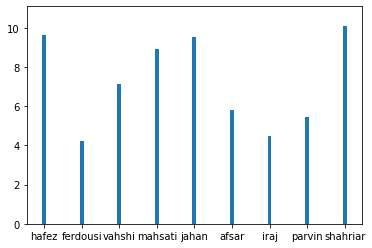

In [293]:
draw_barchart_by_dict(darsad_emotional_bodan_dict , 1 )

<h4 dir="rtl">
    حال در ادامه با توجه به دسته بندی ای که در ابتدا کرده بودین (شاعران خانم و اقا و معاصران) میخواهیم میانگین تعداد کلمات در ابیات شان را بسنجیم.
</h4>

In [364]:
avg_words_in_each_mesrae_dict = {}

def find_avg_words_in_each_mesrae(poet_list):
    numberOf_all_word=0
    for mesrae in poet_list:
        numberOf_all_word += len( mesrae.split(" ") )
    avg =(int(numberOf_all_word /len(poet_list) ))
    print("The average number of words in mesrae = " , end="")
    print (avg) 
    return avg
 

In [365]:
avg_words_in_each_mesrae_dict["hafez"] = find_avg_words_in_each_mesrae(hafez_mesrae_list )

The average number of words in mesrae = 7


In [366]:
avg_words_in_each_mesrae_dict["ferdousi"] = find_avg_words_in_each_mesrae(ferdousi_mesrae_list )

The average number of words in mesrae = 5


In [367]:
avg_words_in_each_mesrae_dict["vahshi"] = find_avg_words_in_each_mesrae(vahshi_mesrae_list )

The average number of words in mesrae = 7


In [368]:
avg_words_in_each_mesrae_dict["mahsati"] = find_avg_words_in_each_mesrae(mahsati_mesrae_list )

The average number of words in mesrae = 6


In [369]:
avg_words_in_each_mesrae_dict["jahan"] = find_avg_words_in_each_mesrae(jahan_mesrae_list )

The average number of words in mesrae = 7


In [370]:
avg_words_in_each_mesrae_dict["afsar"] = find_avg_words_in_each_mesrae(afsar_mesrae_list )

The average number of words in mesrae = 5


In [371]:
avg_words_in_each_mesrae_dict["iraj"] = find_avg_words_in_each_mesrae( iraj_mesrae_list)

The average number of words in mesrae = 7


In [372]:
avg_words_in_each_mesrae_dict["parvin"] = find_avg_words_in_each_mesrae(parvin_mesrae_list )

The average number of words in mesrae = 6


In [373]:
avg_words_in_each_mesrae_dict["shahriar"] = find_avg_words_in_each_mesrae(shahriar_mesrae_list )

The average number of words in mesrae = 7


<h4 dir="rtl">
 با توجه به توابع پیشین پی بردیم که سبک شعری شاعران فردوسی و افسر به صورت حماسی است و با توجه به نمودار زیر میتوان دریافت که تعداد کلمات به کاربرده در شعرشان نیز کمتر است نسبت به دیگر شاعران
</h4>

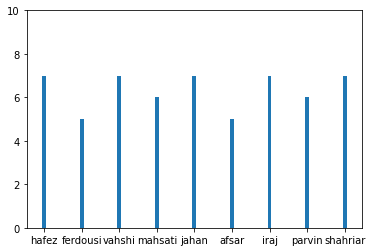

In [376]:
draw_barchart_by_dict(avg_words_in_each_mesrae_dict , 3 )

<h4 dir="rtl">
حالا در ادامه میخواهیم در اشعاری که داریم ببینیم که شاعر مربوطه چند بار نام خود را در شعر آورده و اصطلاحا تخلص به کار برده است. همچنین این مورد میتواند بیشتر تفاوت اشعار زناان و مردان را نشان دهد زیرا شاعران مرد بیشتر نام خود را در اشعارشان بکار میبرند.
</h4>

In [395]:
repetitions_of_the_poets_name={}

def find_repetitions_of_the_poets_name(normalized_dict , name1 , name2 ):
    repetitions=0
    for i in normalized_dict:
        if i.__contains__(name1) or i.__contains__(name2) :
            repetitions+=1
    print(repetitions)
    return repetitions


In [396]:
repetitions_of_the_poets_name["hafez"] = find_repetitions_of_the_poets_name(mesra_normalized['hafez_ghazal.txt'] , "حافظا" , "حافظ")

477


In [397]:
repetitions_of_the_poets_name["ferdousi"] = find_repetitions_of_the_poets_name(mesra_normalized['ferdousi_sohrab.txt'] , "فردوسیا" , "فردوسی")

0


In [398]:
repetitions_of_the_poets_name["vahshi"] = find_repetitions_of_the_poets_name(mesra_normalized['vahshi_ghazalv.txt'] , "وحشیا" , "وحشی")

379


In [399]:
repetitions_of_the_poets_name["mahsati"] = find_repetitions_of_the_poets_name(mesra_normalized['mahsati_robmah.txt'] , "مهستیا" , "مهستی")

1


In [400]:
repetitions_of_the_poets_name["jahan"] = find_repetitions_of_the_poets_name(mesra_normalized['jahan_ghaside.txt'] , "خاتونا" , "خاتون")

0


In [401]:
repetitions_of_the_poets_name["afsar"] = find_repetitions_of_the_poets_name(mesra_normalized['afsar_kooroshname.txt'] , "افسرا" , "افسر")

17


In [402]:
repetitions_of_the_poets_name["iraj"] = find_repetitions_of_the_poets_name(mesra_normalized['iraj_ghaside.txt'] , "میرزا" , "ایرج")

3


In [403]:
repetitions_of_the_poets_name["parvin"] = find_repetitions_of_the_poets_name(mesra_normalized['parvin_ghasidep.txt'] , "پروینا" , "پروین")

23


In [404]:
repetitions_of_the_poets_name["shahriar"] = find_repetitions_of_the_poets_name(mesra_normalized['shahriar_gozidegh.txt'] , "حافظا" , "حافظ")

21


<h4 dir="rtl">
از اعداد حاصل شده میتوان دریافت که شاعران خانم خیلی کمتر نام خود را بکار میبردند و همچنین اصولا شاعران قدیمی تر آرایه ی تخلص را بکار میبردند و رفته رفته کمتر شده.
</h4>

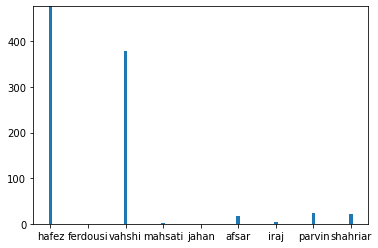

In [406]:
draw_barchart_by_dict(repetitions_of_the_poets_name , 0 )

<h4 dir="rtl">
در ادامه میخواهیم تعداد تکرر کلمه ی زن و مرد را در اشعار مشاهده کنیم و ببینیم که آیا جنسیت شاعران تاثیری در اشعارشان داشته یا خیر.
    برای این کار هم از stemmer  استفاده میکنیم که موارد اضافه اعم از ضمایر و... را حذف نماید و بتوانیم تحلیل دقیق تری داشته باشیم
    
    همچنین در بالاتر ما میانگین وجود یه کلمه را درون متن مان به صورت میانگین نشان دادیم حالا میخواهیم درون هر متن تعدادش را جداگانه نمایش دهیم و به صورت ریشه ای تر نگاه کنیم.
</h4>

In [505]:
from hazm import Stemmer
stemmer = Stemmer()

dict_for_my_word={}

In [506]:
def find_number_of_zan_mard(mesra_normalized , address , my_word1 , my_word2 ):
    counter1=0
    counter2=0
    for mesrae  in mesra_normalized[address]:
        for each_words in mesrae:
                if stemmer.stem(each_words)==my_word1:
                    counter1 +=1
                if stemmer.stem(each_words)== my_word2:
                    counter2 +=1
    print("number of repitation of %s  "%my_word1  ,end="" ) 
    print("is = %s" %counter1)
    print()
    print("number of repitation of %s  "%my_word2  ,end="" ) 
    print("is = %s" %counter2)
    
    return (counter1 , counter2)
        

In [507]:
dict_for_my_word["hafez"]=find_number_of_zan_mard(mesra_normalized , "hafez_ghazal.txt" , "زن", "مرد")

number of repitation of زن  is = 27

number of repitation of مرد  is = 42


In [508]:
dict_for_my_word["ferdousi"]=find_number_of_zan_mard(mesra_normalized , "ferdousi_sohrab.txt" ,"زن", "مرد")

number of repitation of زن  is = 6

number of repitation of مرد  is = 32


In [509]:
dict_for_my_word["vahshi"]=find_number_of_zan_mard(mesra_normalized , "vahshi_ghazalv.txt" , "زن", "مرد")

number of repitation of زن  is = 13

number of repitation of مرد  is = 44


In [510]:
dict_for_my_word["mahsati"]=find_number_of_zan_mard(mesra_normalized , "mahsati_robmah.txt" , "زن", "مرد")

number of repitation of زن  is = 14

number of repitation of مرد  is = 7


In [511]:
dict_for_my_word["jahan"]=find_number_of_zan_mard(mesra_normalized , "jahan_ghaside.txt" , "زن", "مرد")

number of repitation of زن  is = 0

number of repitation of مرد  is = 0


In [512]:
dict_for_my_word["afsar"]=find_number_of_zan_mard(mesra_normalized , "afsar_kooroshname.txt" , "زن", "مرد")

number of repitation of زن  is = 40

number of repitation of مرد  is = 71


In [513]:
dict_for_my_word["iraj"]=find_number_of_zan_mard(mesra_normalized , "iraj_ghaside.txt" , "زن", "مرد")

number of repitation of زن  is = 20

number of repitation of مرد  is = 32


In [514]:
dict_for_my_word["parvin"]=find_number_of_zan_mard(mesra_normalized , "parvin_ghasidep.txt" ,"زن", "مرد")

number of repitation of زن  is = 6

number of repitation of مرد  is = 23


In [515]:
dict_for_my_word["shahriar"]=find_number_of_zan_mard(mesra_normalized , "shahriar_gozidegh.txt" ,"زن", "مرد")

number of repitation of زن  is = 9

number of repitation of مرد  is = 29


In [516]:
t=(9,2)
n=np.empty(t)
print(n)

[[253.44       253.44      ]
 [ 36.         208.76679245]
 [ 36.45584906  36.        ]
 [ 43.74943396  37.36754717]
 [ 46.4845283   45.57283019]
 [253.44       253.44      ]
 [ 36.         253.44      ]
 [ 29.         222.33962264]
 [253.44       253.44      ]]


<h4 dir="rtl">حالا با توجه به نمودار رسم شده میتوان دریافت که بیشتر در مورد مرد بودن  و همچنین مردانگی صحبت شده و همچنین با توجه به عقاید قدیمی و محدودیت موجود آن کمتر در مورد زنان صحبت شده.
</h4>

['hafez', 'ferdousi', 'vahshi', 'mahsati', 'jahan', 'afsar', 'iraj', 'parvin', 'shahriar']


<AxesSubplot:>

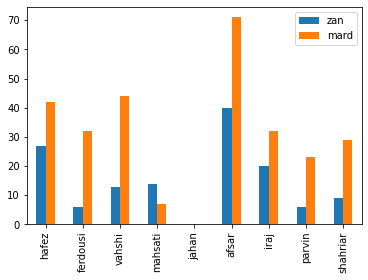

In [517]:
import pandas as pd
index_= 0
poet=[]
for key , val in  dict_for_my_word.items():
    a,b = val
    n[index_][0]=a
    n[index_][1]=b
    index_+=1
    poet.append(key)
print(poet)
data=pd.DataFrame(n, columns=["zan" , "mard"] , index=poet )
data.plot.bar()


<h4 dir="rtl">
حالا در ادامه نیز اشعاری که مذهبی هستند را و شاعران مربوطه را به دست می اوریم و حالا درون لیست مربوطه میریزیم و قابل مشاهده است.

</h4>

In [527]:
mazhabi_words=[]
def crawl_from_mahabi_site(mazhabi_words ):
    address_of_maddahi_site="https://fa.wikishia.net/view/%D8%B1%D9%88%D8%B6%D9%87_%D8%A7%D8%B1%D8%A8%D8%B9%DB%8C%D9%86"
    request_= requests.get(address_of_maddahi_site)
    soup_ = BeautifulSoup(request_.text, "html.parser")
    select_class = soup_.select("p")

    for i in select_class:
        links=i.select('a')
        for j in links:
            if not j.get_text().__contains__("["):
                mazhabi_words.append((j.get_text()))


crawl_from_mahabi_site(mazhabi_words)
print(mazhabi_words)



['بیشتر بدانید', 'واقعه کربلا', 'اسیران کربلا', 'روزشمار واقعه عاشورا', 'روز عاشورا', 'نامه\u200cهای کوفیان به امام حسین(ع)', 'واقعه عاشورا (از نگاه آمار)', 'امام حسین(ع)', 'شیعیان', 'اربعین', 'اسرای اهل بیت(ع)', 'کربلا', 'شهدای کربلا', 'زیارت', 'جابر بن عبدالله انصاری', 'عطیه عوفی', 'اسرای اهل بیت', 'کوفه', 'شام', 'محدث نوری', 'شیخ عباس قمی', 'سید ابن طاووس', 'لهوف', 'شام', 'عراق', 'واقعه عاشورا', 'جابر بن عبدالله انصاری', 'بنی هاشم', 'زیارت', 'امام حسین(ع)', 'مدینه', 'تحقیق درباره اول اربعین حضرت سیدالشهداء(ع)', 'سید محمد علی قاضی طباطبایی', 'جابر بن عبدالله انصاری', 'صحابه', 'رسول خدا(ص)', 'عطیه عوفی', 'کربلا', 'زیارت', 'اسرای اهل بیت', 'شام', 'روضه خوان', 'مدینه', 'بشیر بن جذلم', 'امام سجاد(ع)', 'سکینه', 'ام کلثوم', 'حضرت عباس(ع)', 'رباب', 'علی اصغر', 'نیازمند منبع', 'عروسی قاسم', 'تحریفات', 'نیازمند منبع', 'ابن زیاد', 'یزید', 'حضرت رقیه', 'جابر بن عبدالله انصاری']


<h4 dir="rtl">
حالا ما باید یک دیکشنری بسازیم و درصد مربوطه را در آن ثبت کنیم.
</h4>

In [529]:
darsad_mazhabi_bodan_dict={}

In [530]:
darsad_mazhabi_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , mazhabi_words )

number of hemasi words = 135 
number of all words = 63180 
percentage of hemasi words = 0.2136752136752137


In [531]:
darsad_mazhabi_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , mazhabi_words )

number of hemasi words = 0 
number of all words = 12410 
percentage of hemasi words = 0.0


In [532]:
darsad_mazhabi_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , mazhabi_words )

number of hemasi words = 17 
number of all words = 36622 
percentage of hemasi words = 0.04642018458849872


In [533]:
darsad_mazhabi_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , mazhabi_words )

number of hemasi words = 6 
number of all words = 5243 
percentage of hemasi words = 0.11443829868395958


In [534]:
darsad_mazhabi_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , mazhabi_words )

number of hemasi words = 5 
number of all words = 977 
percentage of hemasi words = 0.511770726714432


In [535]:
darsad_mazhabi_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , mazhabi_words )

number of hemasi words = 38 
number of all words = 32258 
percentage of hemasi words = 0.1178002356004712


In [536]:
darsad_mazhabi_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , mazhabi_words )

number of hemasi words = 16 
number of all words = 16126 
percentage of hemasi words = 0.09921865310678407


In [537]:
darsad_mazhabi_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , mazhabi_words )

number of hemasi words = 21 
number of all words = 17314 
percentage of hemasi words = 0.1212891301836664


In [538]:
darsad_mazhabi_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , mazhabi_words )

number of hemasi words = 29 
number of all words = 23233 
percentage of hemasi words = 0.12482245082425861


<h4 dir="rtl">
 با توجه به نمودار میتوان  دریافت که بین شاعران، جهان ملک خاتون اشعار مذهبی تری دارد.
</h4>

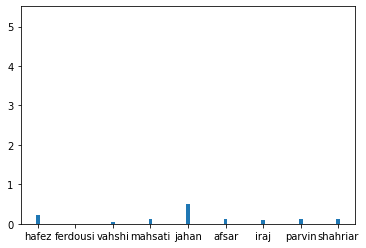

In [540]:
draw_barchart_by_dict(darsad_mazhabi_bodan_dict , 5)